In [30]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)
from sklearn.metrics import max_error


In [31]:
dataset=pd.read_csv("50_Startups.csv")
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [32]:
dataset.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [33]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [34]:
#check duplicate values in dataset
dataset.duplicated().sum()


0

In [35]:
#check dataset values null or not
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
dataset.shape

(50, 5)

In [37]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

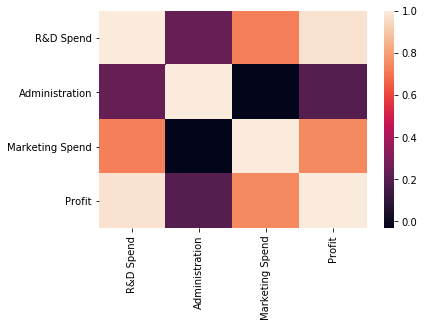

In [38]:
corr=dataset.corr()
sb.heatmap(corr)

In [39]:
train,test=train_test_split(dataset,test_size=0.2,random_state=0)

In [40]:
train.shape,test.shape

((40, 5), (10, 5))

In [41]:
#convert test data into test.csv file
test.to_csv("test.csv",index=False,encoding='utf-8')

In [42]:
train_data,cv_data=train_test_split(train,test_size=0.25,random_state=0)

In [43]:
train_data.shape,cv_data.shape

((30, 5), (10, 5))

In [44]:
#to remove the last column in a dataset
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,4].values

In [45]:
x_train.shape,y_train.shape

((30, 4), (30,))

In [46]:
#separate the cv_data into x_cv and y_cv
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values


In [47]:
# y_cv=y_cv.reshape(1,-1)

In [48]:
x_cv.shape,y_cv.shape

((10, 4), (10,))

In [49]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
class multilinear:
#     Taking care of missing data
    def missing_data(self,x_train):  
        imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
        imputer=imputer.fit(x_train[:,1:3])
        x_train[:,1:3]=imputer.transform(x_train[:,1:3])
        return x_train
    
    
    def categorical_encoding(self,x_train):
        #Encoding categorical data
        #Encoding the Independent variable
        
        labelencoder_x=LabelEncoder()
        x_train[:,3]=labelencoder_x.fit_transform(x_train[:,3])
        # print(x_train)
        onehotcoding=OneHotEncoder(categorical_features=[3])
        # print(onehotcoding)
        dataset=onehotcoding.fit_transform(x_train).toarray()
        # print(dataset[3])
        return dataset
    
    def label_encoding(sel,y_train):
        #Encoding the dependent variable
        labelencoder_y=LabelEncoder()
        # print(labelencoder_y)
        y_train=labelencoder_y.fit_transform(y_train)
        # print(y_train)
        return y_train
    
    def feature_scaling(self,x_train):
        #feature scaling
        sc=StandardScaler()
        x_train=sc.fit_transform(x_train)
        return x_train


In [50]:
obj=multilinear()
    
x_train=obj.missing_data(x_train)
# print(x_train)
dataset=obj.categorical_encoding(x_train)
# print(dataset)
y_train=obj.label_encoding(y_train)
# print(y_train)
x_train=obj.feature_scaling(x_train)
# print(x_train)

/home/user/my_env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [51]:
obj=multilinear()
    
x_cv=obj.missing_data(x_cv)
# print(x_train)
dataset=obj.categorical_encoding(x_cv)
# print(dataset)
y_cv=obj.label_encoding(y_cv)
# print(y_cv)



/home/user/my_env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [52]:
sc=StandardScaler()
x_cv=sc.fit_transform(x_cv)


In [53]:
#fitting multilinear regression to the training set
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#predicting the train set results
y_predict=regressor.predict(x_train)
# y_predict

In [55]:
# getting predictions on cross validation dataset
y_pred = regressor.predict(x_cv)


In [56]:
acc_train=sklearn.metrics.r2_score(y_train,y_predict)*100
print("Accuracy of train data =",acc_train)


acc_cv=sklearn.metrics.max_error(y_cv,y_pred)
print("Accuracy of cross validation data =",acc_cv)


Accuracy of train data = 95.90104647305367
Accuracy of cross validation data = 25.452926226396663


In [57]:
# create model with pickle file
file = open('training.pkl', 'wb')
pickle.dump(regressor,file)
file.close()